In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install mne numpy pandas scikit-learn tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 67.6 MB/s eta 0:00:00


In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving S001R01.edf to S001R01.edf


In [ ]:
import mne
edf_path = list(uploaded.keys())[0]
raw_data = mne.io.read_raw_edf(edf_path, preload=True)

Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Extracting EDF parameters from /content/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
EEG Data Shape: (64, 9760)
Sampling Frequency: 160.0
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Using matplotlib as 2D backend.


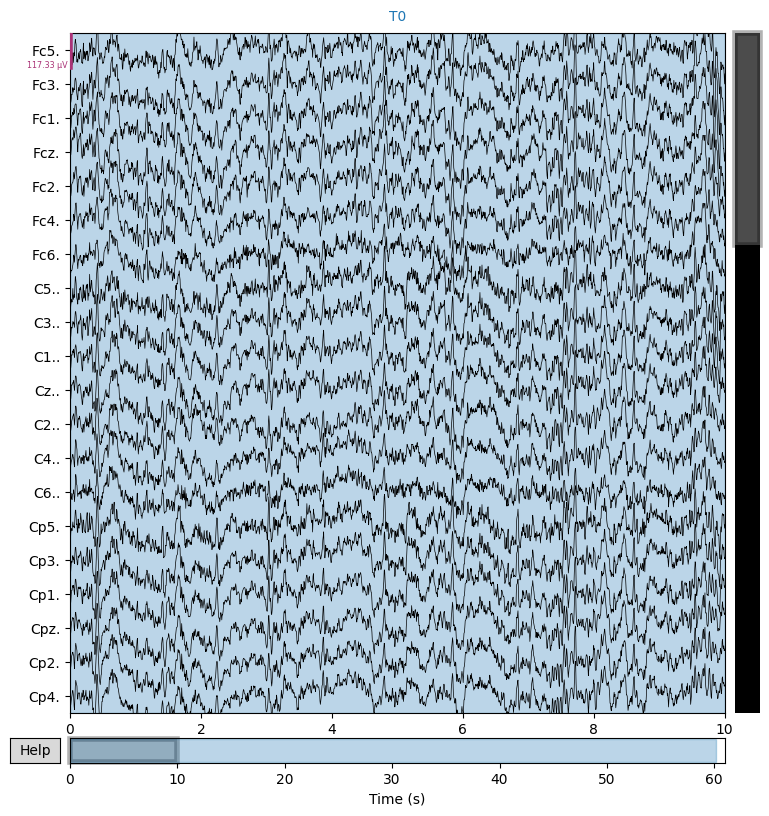

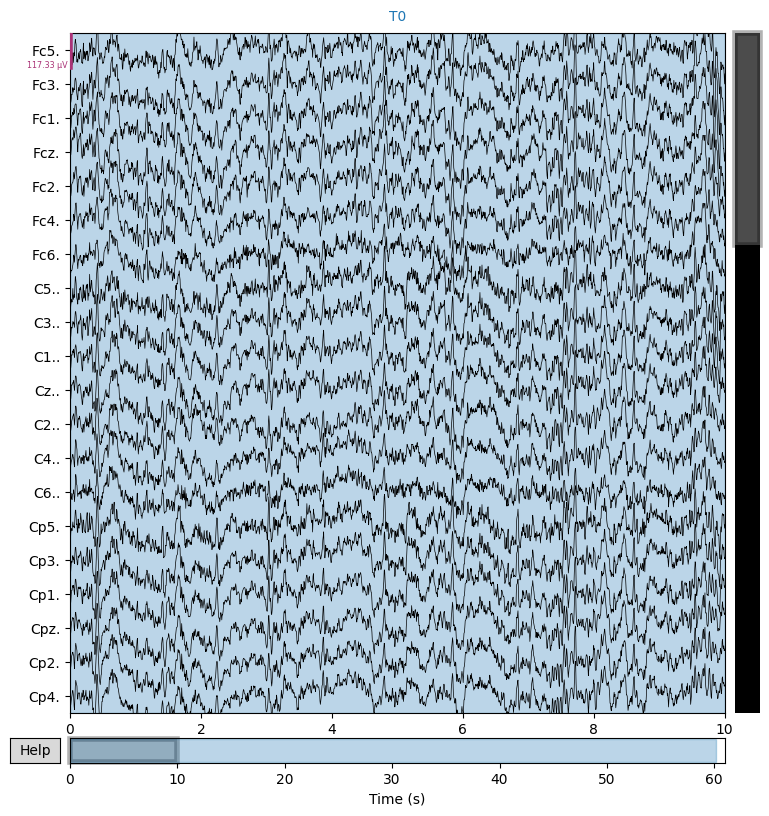

In [ ]:
edf_path = "S001R01.edf"  # Update with your correct path
raw_data = mne.io.read_raw_edf(edf_path, preload=True)

# Get EEG signal data
eeg_data = raw_data.get_data()  # Shape: (channels, time_samples)
channel_names = raw_data.ch_names
sampling_freq = raw_data.info['sfreq']

print("EEG Data Shape:", eeg_data.shape)  # (Channels x Time Samples)
print("Sampling Frequency:", sampling_freq)
print("Channels:", channel_names)

# Plot EEG signals
raw_data.plot(duration=10, scalings='auto')  # Adjust duration if needed


In [ ]:
# Apply a bandpass filter (0.5 Hz - 40 Hz) to remove noise
raw_data.filter(l_freq=0.5, h_freq=40, fir_design='firwin')

# Get filtered data
filtered_eeg = raw_data.get_data()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [ ]:
def extract_features(eeg_data, sampling_freq):
    features = []
    for channel in eeg_data:
        freqs, psd = welch(channel, fs=sampling_freq, nperseg=256)
        mean_psd = np.mean(psd)
        var_psd = np.var(psd)

        # Time domain features
        mean_val = np.mean(channel)
        std_val = np.std(channel)
        max_val = np.max(channel)
        min_val = np.min(channel)

        features.append([mean_psd, var_psd, mean_val, std_val, max_val, min_val])

    return np.array(features)

features = extract_features(filtered_eeg, sampling_freq)

print("Extracted Features Shape:", features.shape)


Extracted Features Shape: (64, 6)


In [ ]:
num_samples = features.shape[0]
labels = np.array([0] * (num_samples//2) + [1] * (num_samples//2))  # Example labels

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

print("Training Samples:", X_train.shape, "Testing Samples:", X_test.shape)


Training Samples: (51, 6) Testing Samples: (13, 6)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.6923076923076923


In [ ]:
print("New sample features shape:",new_sample_features.shape)


New sample features shape: (64, 6)


In [ ]:
# Extract features for new EEG sample
new_sample_features = extract_features(filtered_eeg, sampling_freq)

# Ensure correct shape (taking mean across channels)
new_sample_scaled = scaler.transform(new_sample_features.mean(axis=0).reshape(1, -1))

# Random Forest Prediction
predicted_class_rf = clf.predict(new_sample_scaled)
print("Predicted User Class (RF):", predicted_class_rf)


Predicted User Class (RF): [0]


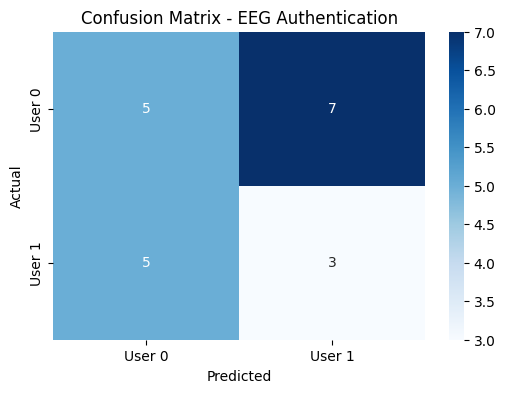

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Example: Create dummy EEG features and labels (replace with your real data)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.array([0]*50 + [1]*50)  # Labels: two users

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["User 0", "User 1"], yticklabels=["User 0", "User 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EEG Authentication")
plt.show()